In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
stud= pd.read_csv('placement_data.csv')

In [52]:
stud.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [53]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [54]:
stud['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [55]:
stud['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [56]:
stud.groupby('workex').describe()

sl_no                                                           ssc_p  \
        count        mean        std  min    25%    50%     75%    max  count   
workex                                                                          
No      141.0  105.340426  63.800227  1.0  52.00   98.0  164.00  215.0  141.0   
Yes      74.0  113.067568  59.151149  2.0  78.75  123.5  156.75  213.0   74.0   

                   ...    mba_p        salary                                \
             mean  ...      75%    max  count           mean            std   
workex             ...                                                        
No      65.928652  ...  65.4800  74.56   84.0  277523.809524   61643.255856   
Yes     69.922838  ...  68.1675  77.89   64.0  303265.625000  122440.817215   

                                                          
             min       25%       50%       75%       max  
workex                                                    
No      200000.0  240000.0  262000.0  300000.0  500000.0  
Yes     200000.0  250000.0  267500.0  300000.0  940000.0  

[2 rows x 56 columns]

In [78]:
# stud.loc[stud['salary'].isna()]
sum(stud['salary'].isna())

67

In [94]:
stud['salary'].fillna(value = stud['salary'].mean(),inplace=True)

In [95]:
stud.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


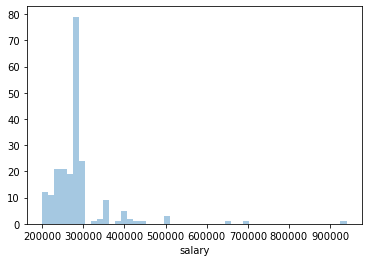

In [96]:
sns.distplot(stud['salary'],kde=False)

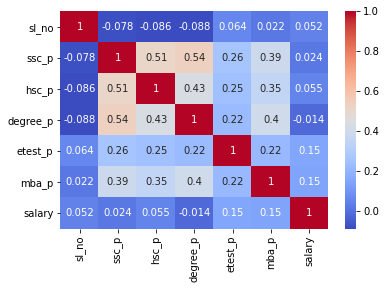

In [97]:
sns.heatmap(stud.corr(),annot=True,cmap='coolwarm')

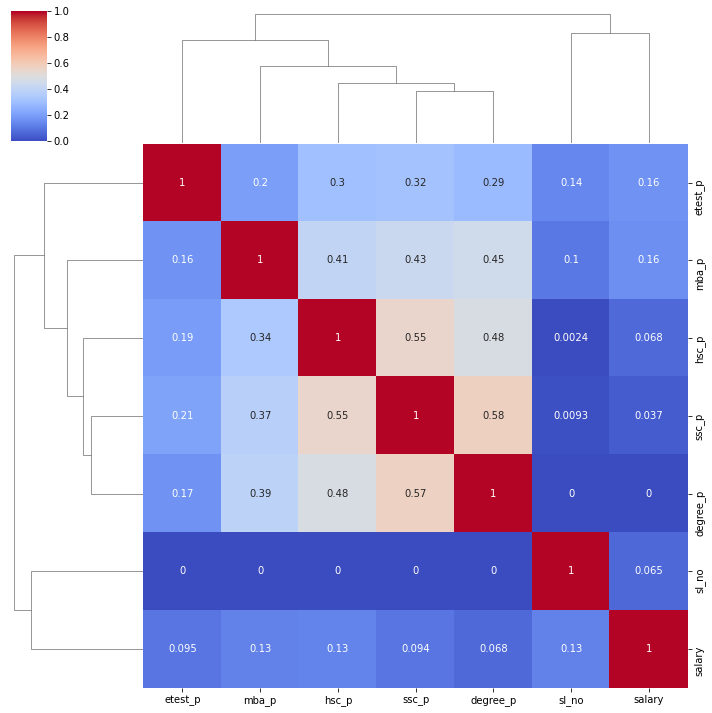

In [98]:
sns.clustermap(stud.corr(), cmap='coolwarm',standard_scale=1,annot=True)

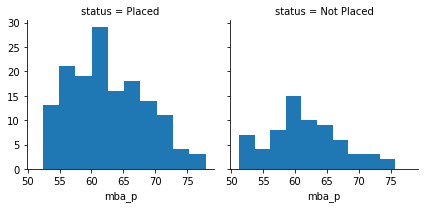

In [99]:
g=sns.FacetGrid(data=stud,col='status')
g.map(plt.hist, 'mba_p')


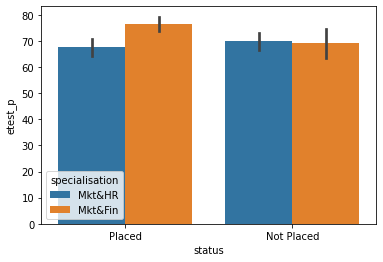

In [100]:
sns.barplot(x='status',y='etest_p',data=stud, hue='specialisation')

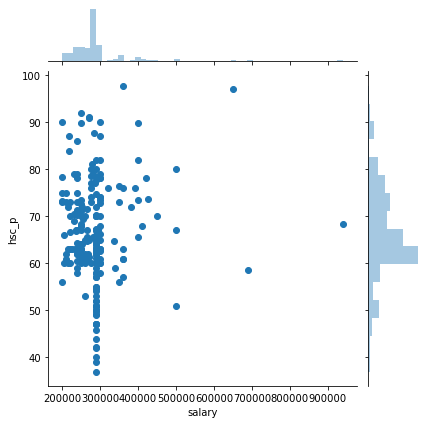

In [101]:
sns.jointplot(x='salary',y='hsc_p', data=stud)

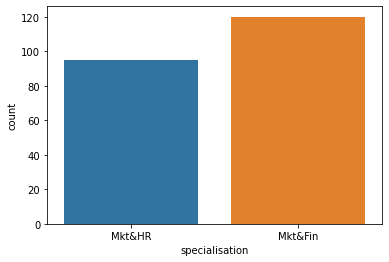

In [102]:
sns.countplot(data=stud, x='specialisation')

In [ ]:
#Question1: Which factor influenced a candidate in getting placed?
# From the correlation graphs(line 8, line 9) they are : etest_p, mba_p, hsc_p

#Question2: Does percentage matters for one to get placed?
# YES, all the columns which correlated with been placed are percentages

#Question3: Which degree specialization is much demanded by corporate?
# From the barplot(line 36), MKt&Fin are more in demand

#Question4: Play with the data conducting all statistical tests.
#   ........